# BUSINESS OBJECTIVES

1. We have the Numerical Data with us for the countries whre the data refers to various socio - economic parameters of the countries. The data availaible with us contains factors such as life expectancy rate etc.
2.Our Business objective is to segrate these countries into optimal number of clusters and find out atleast 5 countries who lie in the cluster where they will be requiring funding from our client.
3. This Study is divided into two parts EDA and Modeling or segmenting of the countries.

# EDA TABLE OF CONTENT
1. Box plot to detect the influence of outliers.
2. Histogram to get an intuition of our data distribution.
3. Segmenting the data into top 10 and bottom 10 countries , where we will be plotting various pie charts and bar charts to see how our economic variables such as gdpp etc is varying and what is the general trend we can observe forming by these entities.


# MODELING
1. We will be standardising the data and removing any extra features that we have created during our analysis but are certainly not necessary while modeling
2. We will be performing the modeling using two clustering techniques K means and Hierarchical Clustering
3. In a seprate section we will be performing outliers analysis. It will contain the total data getting removed the list of the countries getting removed. Based on that we will take a call whether outliers treatment is a viable option for our present business problem.

# CLUSTER ANALYSIS
1. We will be the plotting the box plot to see how each cluster is coming along.

# FINAL RECOMMENDATION
Based on the cluster and model analysis and taking various economic and socio-economic factors into consideration we can Recommend the countries to help get a financial aid.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.metrics import silhouette_score

In [2]:
data_1 = pd.read_csv('Country-data (1).csv')

In [3]:
data_1.head() # checking the first 5 rows of our dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data_1.info() # we have no null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data_1.describe() # A brief glance at the statistical parameters of our dataset
''' From the brief below something which can be noticed that there are indeed outliers present in our dataset
also the range of certain features of our dataset is  large. Columns such as child mortality , is showing a huge 
jump from 50 to 75% . similar is the case with income'''

' From the brief below something which can be noticed that there are indeed outliers present in our dataset\nalso the range of certain features of our dataset is  large. Columns such as child mortality , is showing a huge \njump from 50 to 75% . similar is the case with income'

In [6]:
'''We will start our EDA with seeing the Distribution of GDP , total_fer etc in terms of box plot and histogram
to identify how the distribution of our numerical features look like'''


features_numerical =  [feature for feature in data_1.columns if data_1[feature].dtype != 'O']

# We have taken the Numerical features of our dataset.

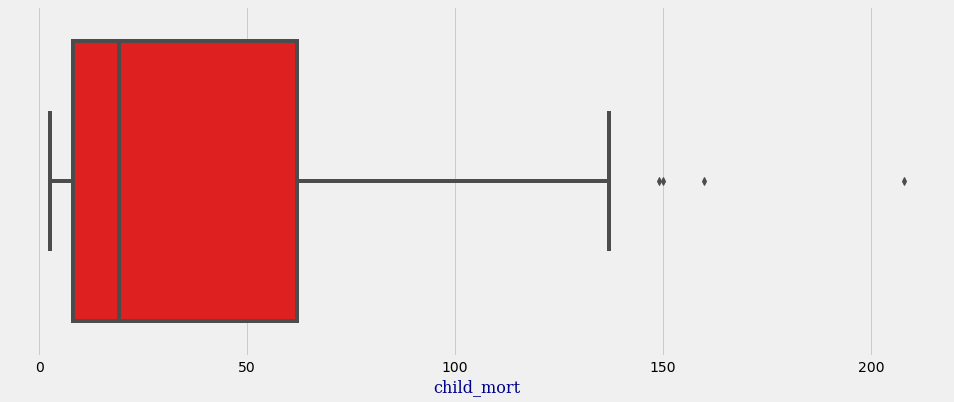

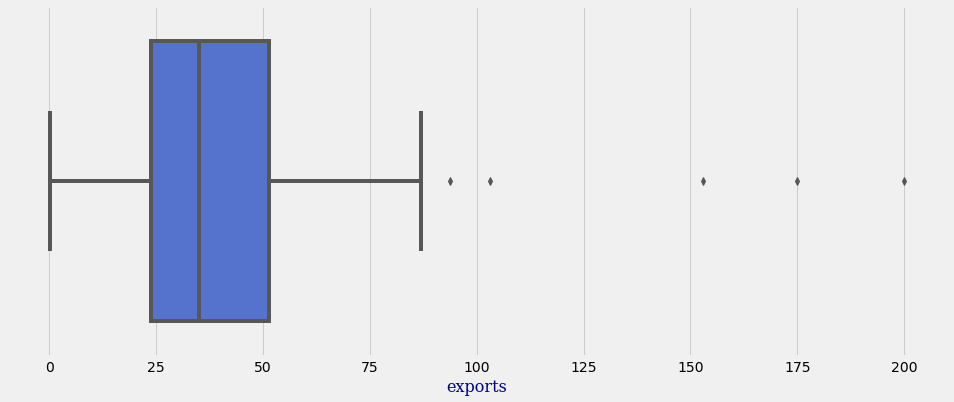

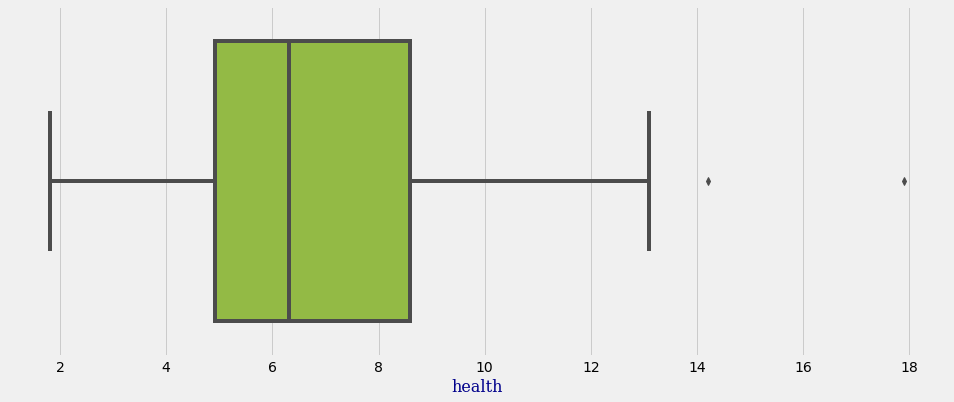

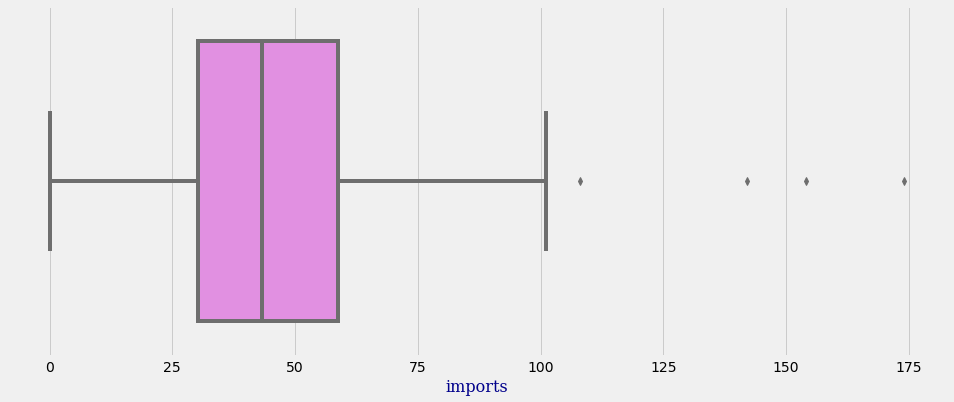

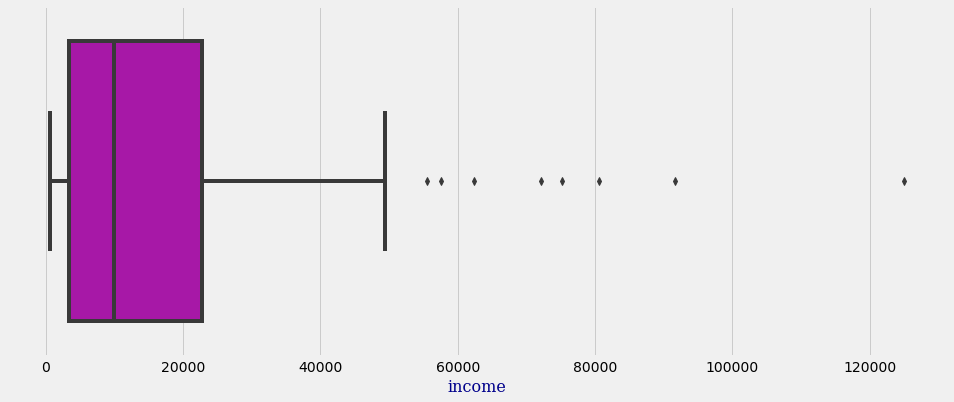

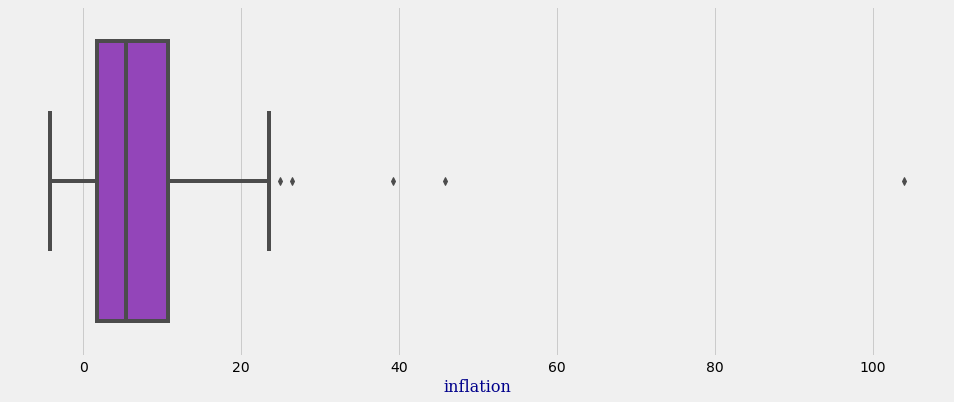

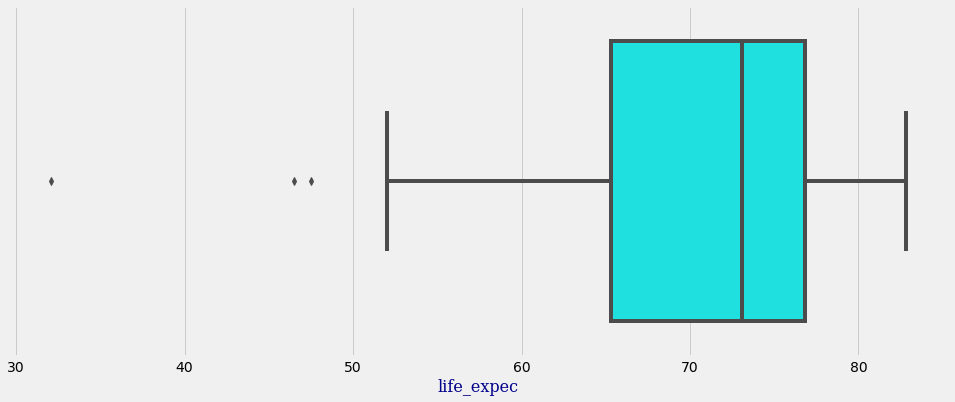

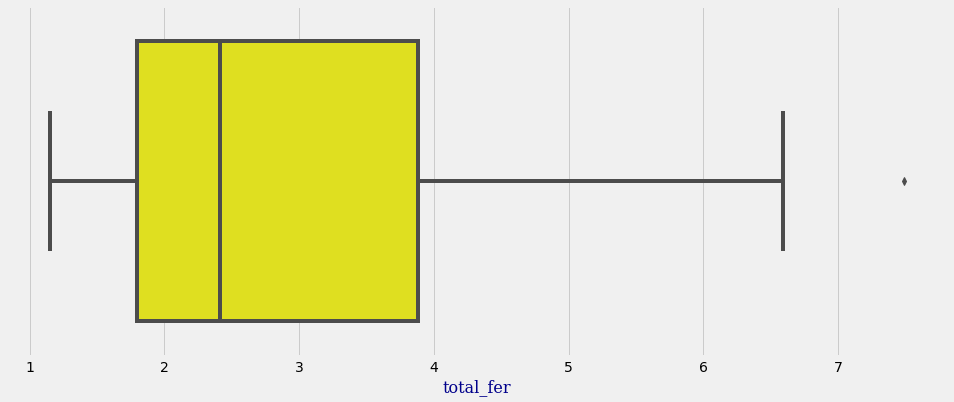

In [7]:
features_numerical
colors_assignment = ['r','royalblue','yellowgreen','violet','m','darkorchid','cyan','yellow']
# We are creating a custom font for our labels 
font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

''' Here We will be writing a for loop to display the  box plot of each our features'''

for features,color in zip(features_numerical,colors_assignment): # Here we are assigning different colors to different features 
    
    fig,ax = plt.subplots(figsize = (15,6))
    
    sns.boxplot(data_1[features],color=color)
    
    plt.xlabel(xlabel =features,fontdict=font)
 
    
    plt.show()
    
    '''Something which can be noticed from our initial Analysis is that maximum number of outliers are present
    in export and income'''

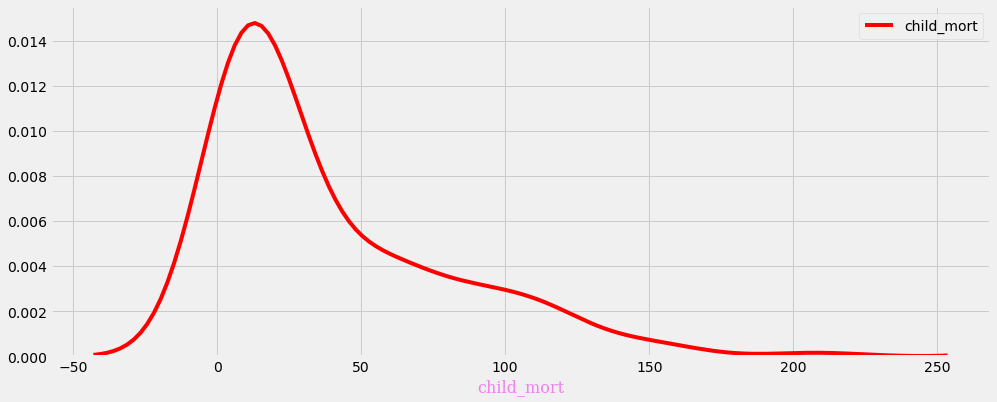

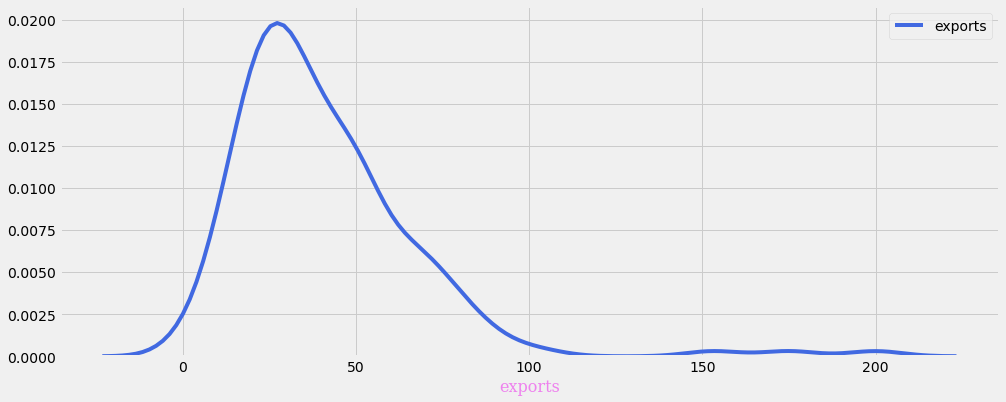

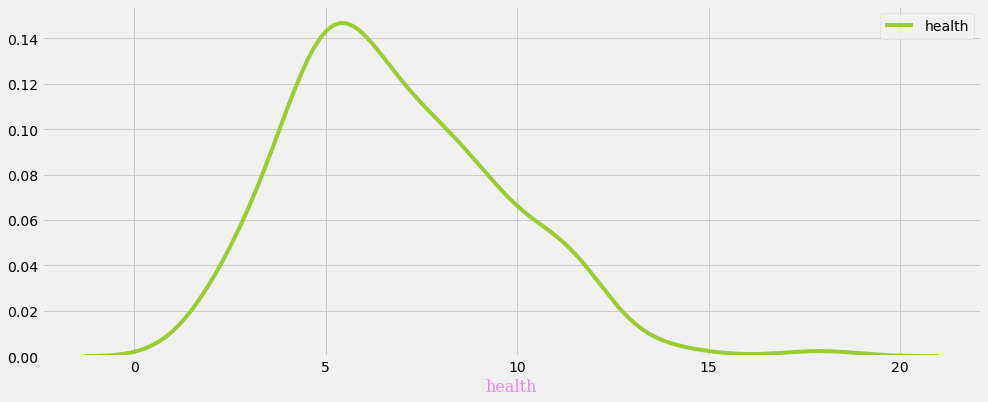

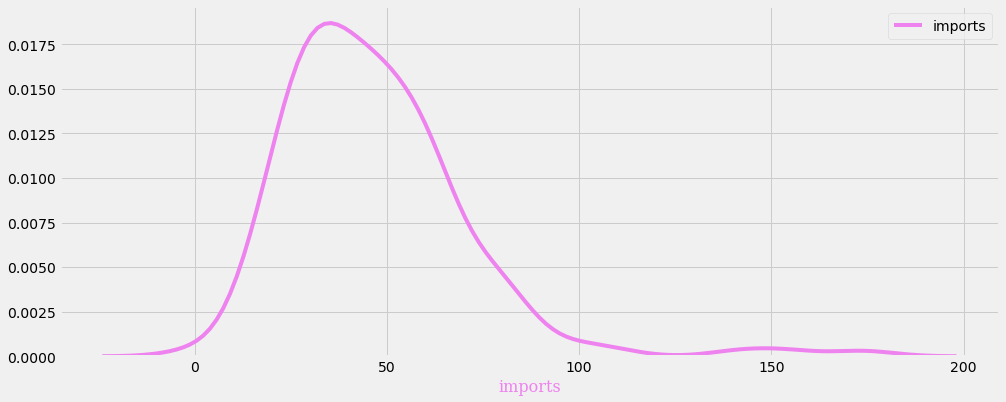

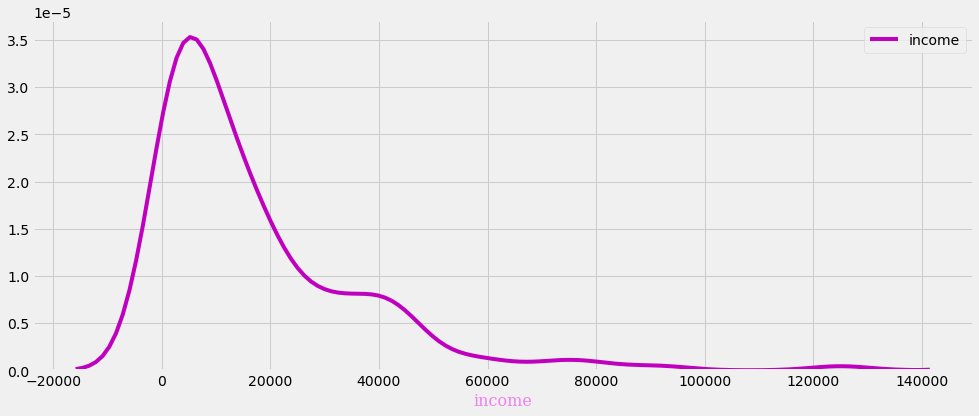

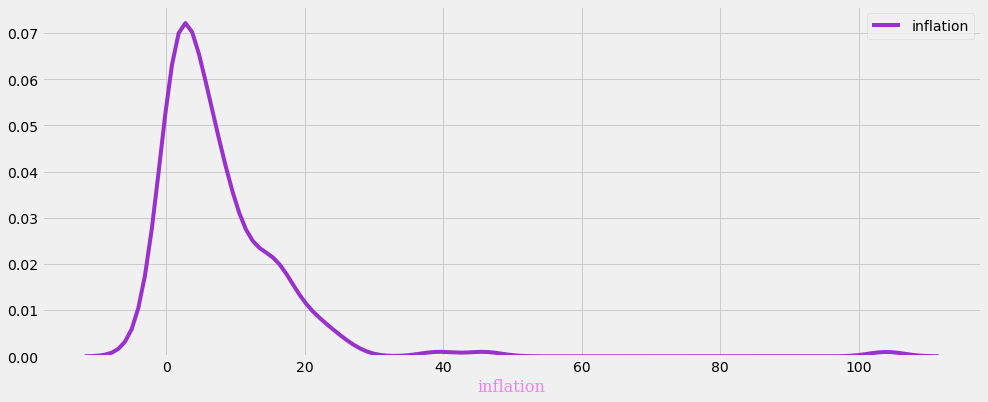

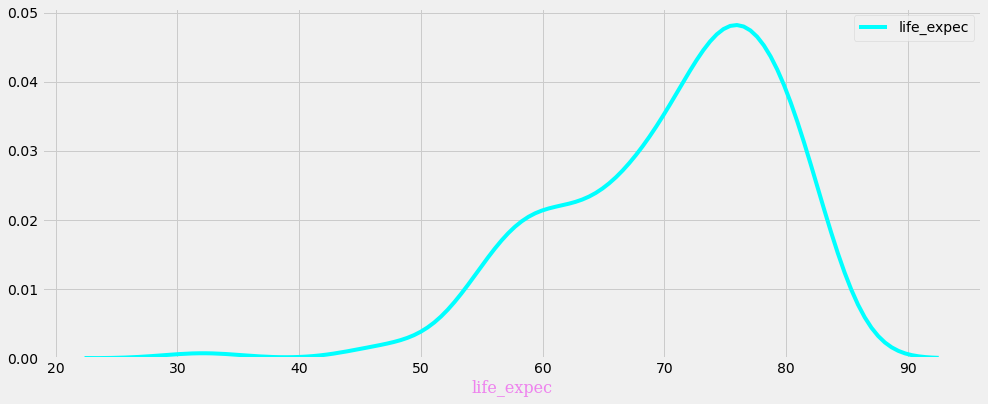

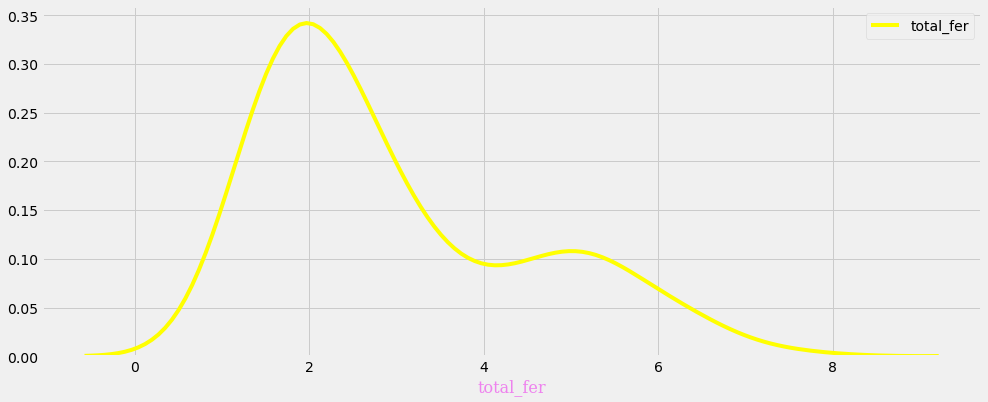

'Our data seems to be normally distributed to some extent but their is an evident presence of skewness\nand kurtosis for some of our columns in a much large content compared to other columns.'

In [8]:
# Plotting the histogram 
features_numerical
colors_assignment = ['r','royalblue','yellowgreen','violet','m','darkorchid','cyan','yellow']
# We are creating a custom font for our labels 
font = {'family': 'serif',
        'color':  'violet',
        'weight': 'normal',
        'size': 16,
        }

''' Here We will be writing a for loop to display the  Histogram  of each our features'''

for features,color in zip(features_numerical,colors_assignment): # Here we are assigning different colors to different features 
    
    fig,ax = plt.subplots(figsize = (15,6))
    
    sns.kdeplot(data_1[features],color=color)
    
    plt.xlabel(xlabel =features,fontdict=font)
 
    
    plt.show()
    


'''Our data seems to be normally distributed to some extent but their is an evident presence of skewness
and kurtosis for some of our columns in a much large content compared to other columns.'''
    

In [9]:
'''In our dataset country as a category is not a very significant feature where plotting a bargraph or piechart
seprately for each of the country will not make sence , instead we will be dividing our numerical continious
columns into binned columns where will be dividing the data into certain quantiles and then will be taking a
value count with respect to countries '''

''' Here we will be performing binning of data as per width , here the concept lies in that all the data
which lies in the similar range can be binned together '''

''' There are generally two types of binning availaible equal width binning equal frequency binning'''

data_2 = data_1.copy() # creating a deep copy

for features in features_numerical:
    
    data_2[features + "_" + "binned"] = pd.cut(data_2[features],bins=10)

In [10]:
data_2.head() # We have successfully created the count of each of the our numerical data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,child_mort_binned,exports_binned,health_binned,imports_binned,income_binned,inflation_binned,life_expec_binned,total_fer_binned,gdpp_binned
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,"(84.76, 105.3]","(-0.0909, 20.098]","(6.637, 8.246]","(34.853, 52.246]","(484.609, 13048.1]","(6.611, 17.432]","(52.38, 57.45]","(5.588, 6.222]","(126.231, 10707.9]"
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,"(2.395, 23.14]","(20.098, 40.087]","(5.028, 6.637]","(34.853, 52.246]","(484.609, 13048.1]","(-4.318, 6.611]","(72.66, 77.73]","(1.144, 1.784]","(126.231, 10707.9]"
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,"(23.14, 43.68]","(20.098, 40.087]","(3.419, 5.028]","(17.459, 34.853]","(484.609, 13048.1]","(6.611, 17.432]","(72.66, 77.73]","(2.418, 3.052]","(126.231, 10707.9]"
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,"(105.3, 125.84]","(60.076, 80.065]","(1.794, 3.419]","(34.853, 52.246]","(484.609, 13048.1]","(17.432, 28.253]","(57.45, 62.52]","(5.588, 6.222]","(126.231, 10707.9]"
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,"(2.395, 23.14]","(40.087, 60.076]","(5.028, 6.637]","(52.246, 69.64]","(13048.1, 25487.2]","(-4.318, 6.611]","(72.66, 77.73]","(1.784, 2.418]","(10707.9, 21184.8]"


In [11]:
# Lets take a look at top 10 countries GDP wise


data_3 = data_2.sort_values(by='gdpp',ascending=False)

In [12]:
data_3 = data_3.head(5)

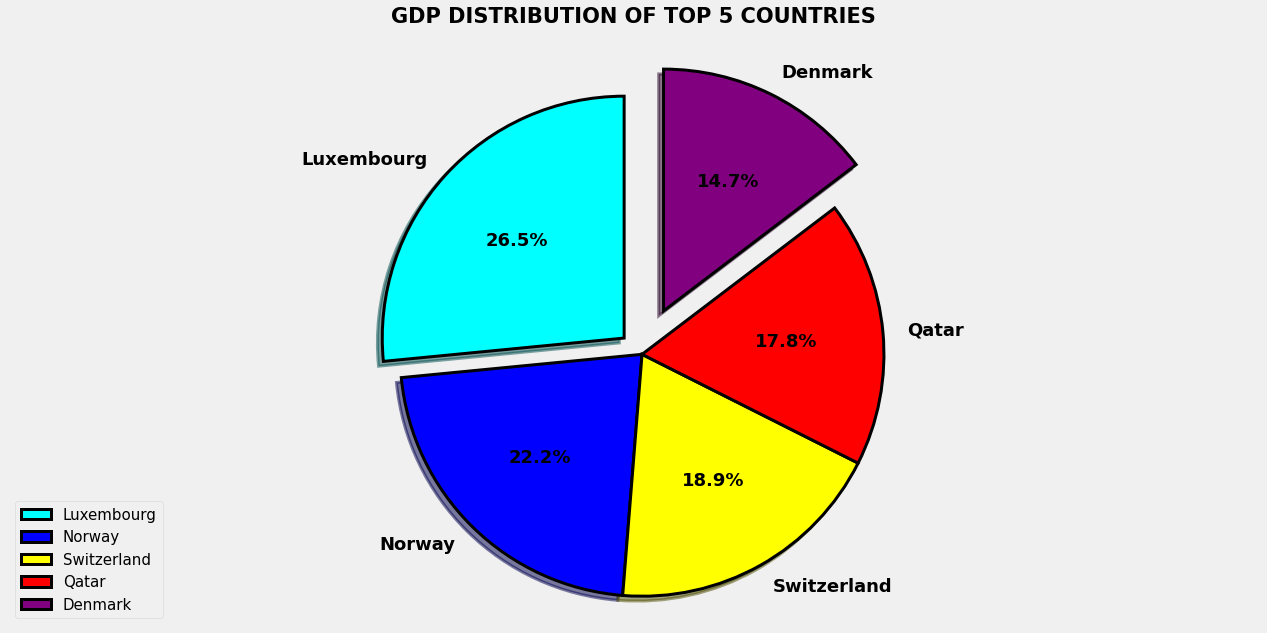

In [13]:
x1 = data_3.iloc[:,9]
x1 # We are taking the GDP for all the 5 countries

plt.figure(figsize=(20,10))
explode = [0.1,0.0,0.0,0.0,0.2] # we will explode our pie chart for the first country and bottom 5th country
colors = ['cyan','blue','yellow','red','purple']
plt.pie(x1,labels=data_3.iloc[:,0],startangle=90,explode=explode,colors = colors,autopct = "%1.1f%%",shadow = True
       ,labeldistance=1.1,textprops = {'fontweight':'bold','fontsize':18},
        wedgeprops={'linewidth':3,'edgecolor':"k"}) # All the parameters of the above are directly
#refered from matplotlib documentation

plt.legend(loc = 3,fontsize = 15)
plt.title("GDP DISTRIBUTION OF TOP 5 COUNTRIES",fontweight = "bold",fontsize = 21,pad = 20)
plt.axis('equal')
plt.show()





In [14]:
'''Since values of the features such as exports,health and imports are given in terms of GDP
we can convert those into numerical values and store it in a new column'''
data_2['exports_value'] = (data_2['exports']/100) * data_2['gdpp']
data_2['health_value'] = (data_2['health']/100) * data_2['gdpp']
data_2['imports_value'] = (data_2['imports']/100) * data_2['gdpp']




In [15]:
data_exports = data_2.sort_values(by='exports_value',ascending=False).head(5)

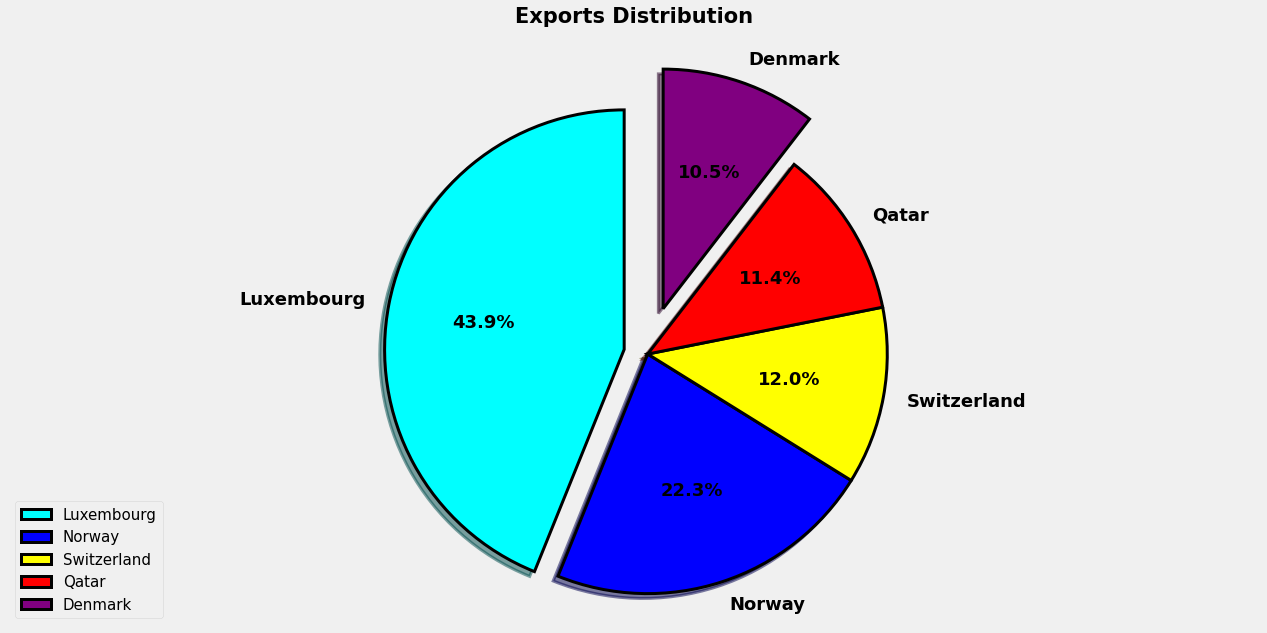

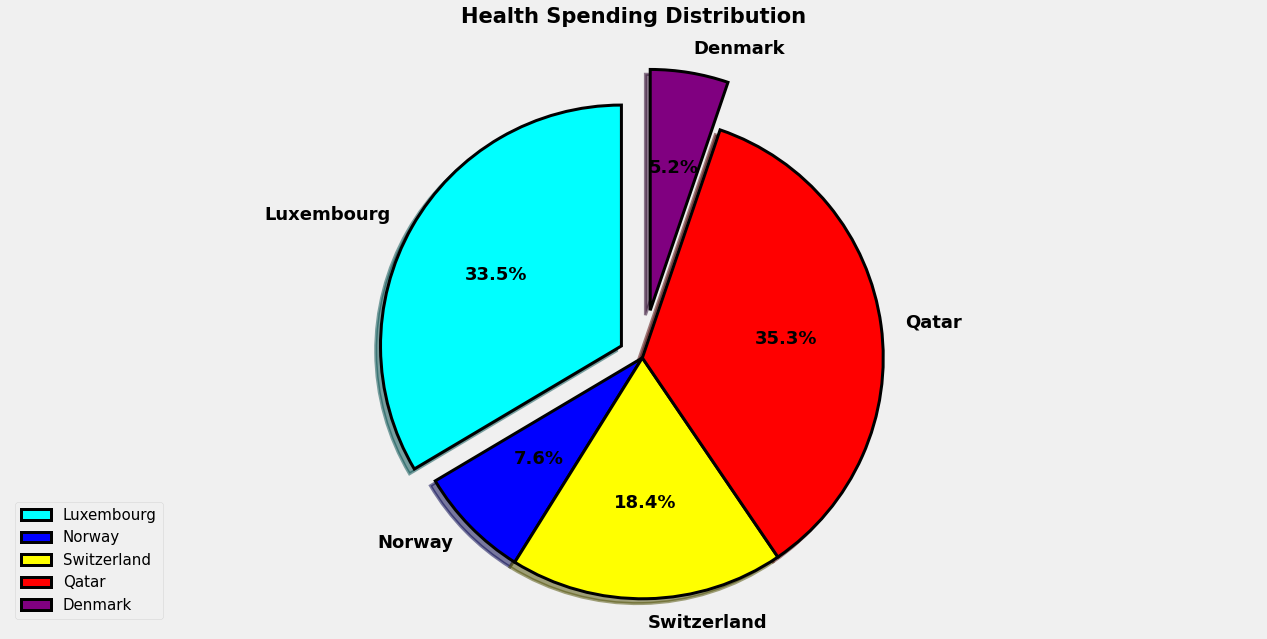

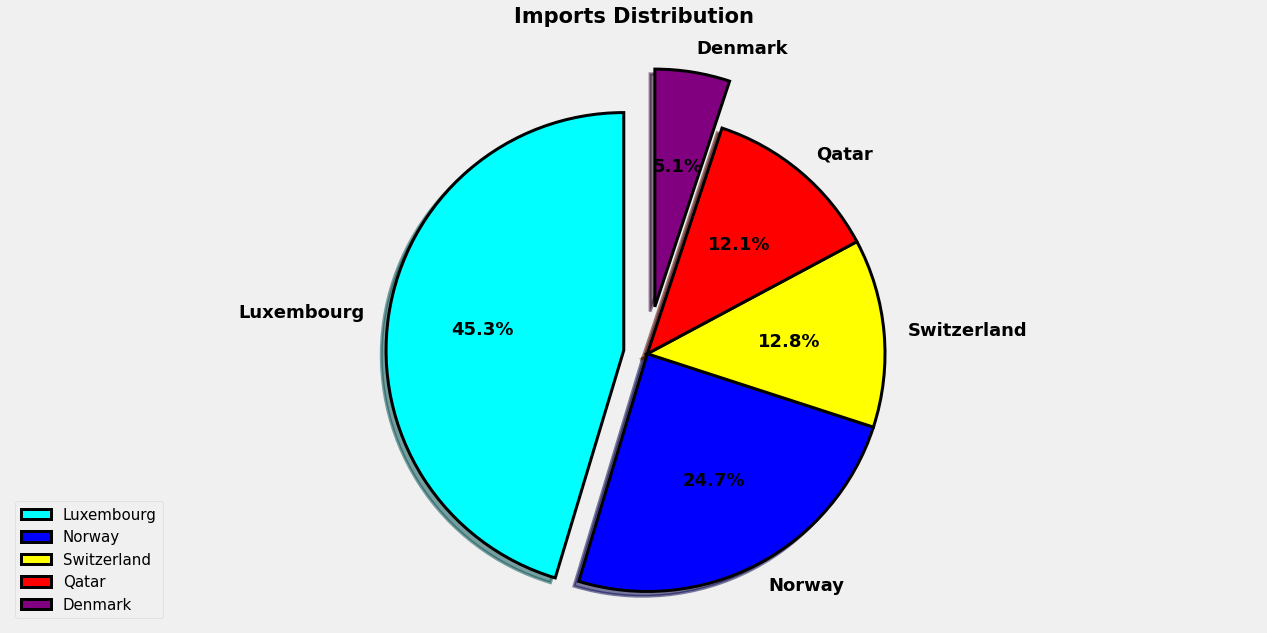

In [16]:
x2 = data_exports.loc[:,'exports_value'] # Taking all the rows for all the countries , 
x2 # We are taking the Exports distribution of the top 5 countries

plt.figure(figsize=(20,10))
explode = [0.1,0.0,0.0,0.0,0.2] # we will explode our pie chart for the first country and bottom 5th country
colors = ['cyan','blue','yellow','red','purple']
plt.pie(x2,labels=data_3.iloc[:,0],startangle=90,explode=explode,colors = colors,autopct = "%1.1f%%",shadow = True
       ,labeldistance=1.1,textprops = {'fontweight':'bold','fontsize':18},
        wedgeprops={'linewidth':3,'edgecolor':"k"})

plt.legend(loc = 3,fontsize = 15)
plt.title("Exports Distribution",fontweight = "bold",fontsize = 21,pad = 20)
plt.axis('equal')
plt.show()

'''Something which can be noticed is that among the top 5 countries taking all the exports value together
we can see that almost 44% alone is contributed by Luxenberge with Qatar and Switzerland having similar
kinds of exports , lowest shown by denmark'''


# Lets plot the similar distribution with respect to health funding

x3 = data_exports.loc[:,'health_value'] # Taking all the rows for all the countries , 
x3 # We are taking the health funding  of the top 5 countries

plt.figure(figsize=(20,10))
explode = [0.1,0.0,0.0,0.0,0.2] # we will explode our pie chart for the first country and bottom 5th country
colors = ['cyan','blue','yellow','red','purple']
plt.pie(x3,labels=data_3.iloc[:,0],startangle=90,explode=explode,colors = colors,autopct = "%1.1f%%",shadow = True
       ,labeldistance=1.1,textprops = {'fontweight':'bold','fontsize':18},
        wedgeprops={'linewidth':3,'edgecolor':"k"})

plt.legend(loc = 3,fontsize = 15) # for making sure the legends are not overlapping with the plot
plt.title("Health Spending Distribution",fontweight = "bold",fontsize = 21,pad = 20)
plt.axis('equal')
plt.show()


x4 = data_exports.loc[:,'imports_value'] # Taking all the rows for all the countries , 
x4 # We are taking the import value of  top 5 countries

plt.figure(figsize=(20,10))
explode = [0.1,0.0,0.0,0.0,0.2] # we will explode our pie chart for the first country and bottom 5th country
colors = ['cyan','blue','yellow','red','purple']
plt.pie(x4,labels=data_3.iloc[:,0],startangle=90,explode=explode,colors = colors,autopct = "%1.1f%%",shadow = True
       ,labeldistance=1.1,textprops = {'fontweight':'bold','fontsize':18},
        wedgeprops={'linewidth':3,'edgecolor':"k"})

plt.legend(loc = 3,fontsize = 15)
plt.title("Imports Distribution",fontweight = "bold",fontsize = 21,pad = 20)
plt.axis('equal')
plt.show()












# INFERENCES

    1. In terms of exports Luxenberg is taking the lead where it is showing 175% more export earnings than its GDP
    2. For Health Spending least amount of spending is shown by denmark where Qatar showing the higest spending among the top 5 countries
   

No handles with labels found to put in legend.


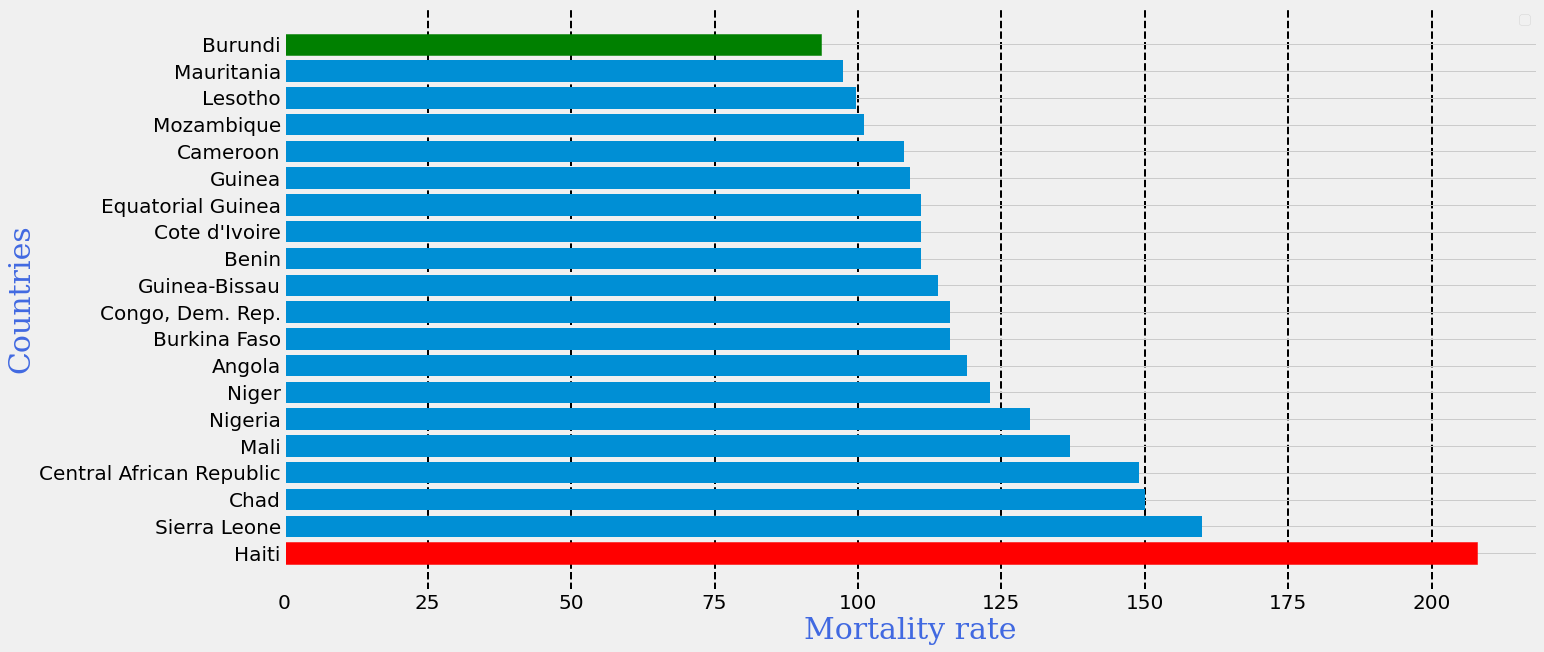

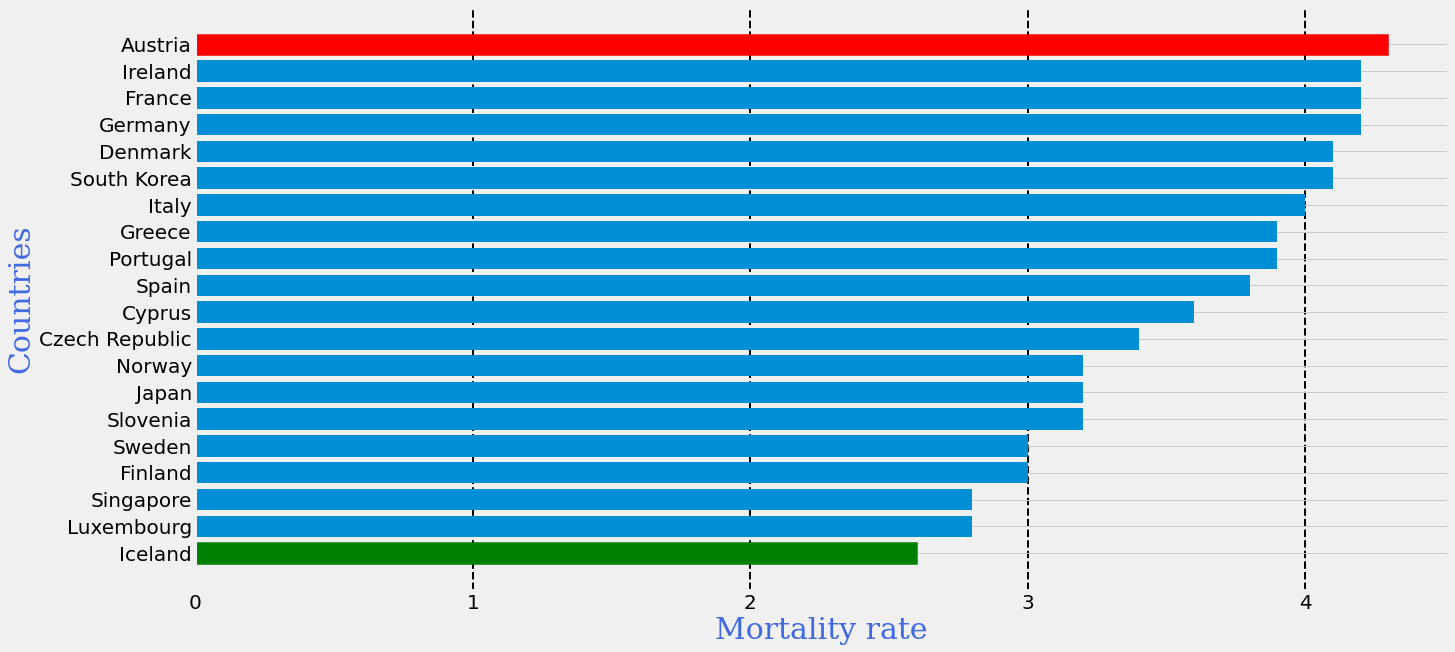

In [17]:
# Lets go ahead and plot a bar chart for top 20 and bottom 20 countries in terms of child mortality,
#Average Individual Income and life expectancy rate for the general population
font = {'family': 'serif',
        'color':  'royalblue',
        'weight': 'normal',
        'size': 30,
        }
fig = plt.figure(figsize = (20,10))
ax1 = plt.subplot(111) # This for top 20 countries

data_child_mortality_bottom_20 = data_2.sort_values(by='child_mort',ascending=False).head(20)  
'''Sorting the above countries with respect to child mortality rate and taking 
the bottom 20 countries which are showing the highest mortality rate
'''
child_mortality = ax1.barh(data_child_mortality_bottom_20.country,data_child_mortality_bottom_20.child_mort)
child_mortality[0].set_color('red')
child_mortality[19].set_color('green')
ax1.xaxis.grid(linestyle = '--',linewidth = 2,color = 'black')
ax1.set_xlabel('Mortality rate',fontdict = font)
ax1.set_ylabel('Countries',fontdict = font)
plt.xticks(fontsize=20)  # setting up the fontsize for xticks and yticks labels
plt.yticks(fontsize=20)
ax1.legend()#setting up for y label
plt.show()

''' Lets plot a similar graph with respect top 20 countries having lowest child mortality rate '''

fig = plt.figure(figsize = (20,10))
ax1 = plt.subplot(111) # This for top 20 countries

data_child_mortality_top_20 = data_2.sort_values(by='child_mort',ascending=True).head(20)  
'''Sorting the above countries with respect to child mortality rate and taking 
the bottom 20 countries which are showing the highest mortality rate
'''
child_mortality_top = ax1.barh(data_child_mortality_top_20.country,data_child_mortality_top_20.child_mort)

child_mortality_top[0].set_color('green')
child_mortality_top[19].set_color('red')
ax1.xaxis.grid(linestyle = '--',linewidth = 2,color = 'black')
ax1.set_xlabel('Mortality rate',fontdict = font)
ax1.set_ylabel('Countries',fontdict = font)
plt.xticks(fontsize=20)  # setting up the fontsize for xticks and yticks labels
plt.yticks(fontsize=20)  #setting up for y label
plt.show()









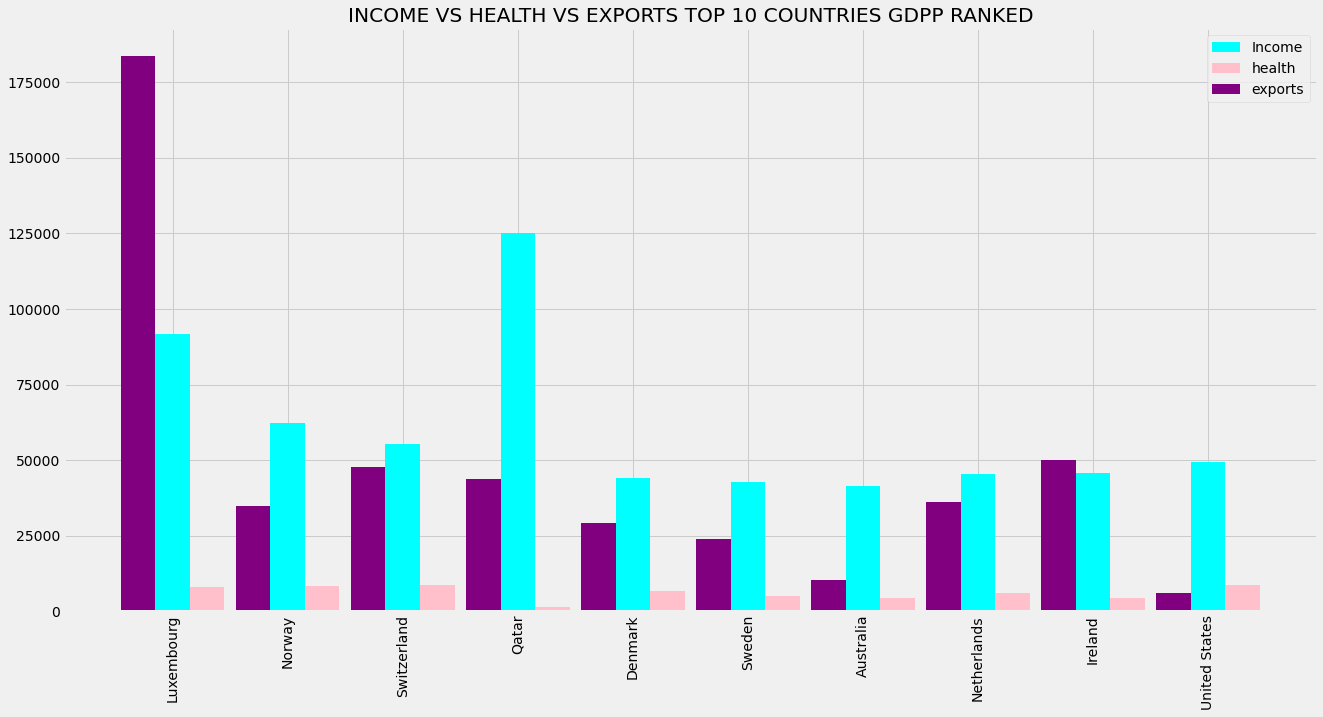

In [18]:
'''Below is the demonstration of Income , health and exports which are directly derived from mentioned gdpp'''

plt.style.use('fivethirtyeight')
data_top_10 = data_2.sort_values(by='gdpp',ascending=False).head(10) # taking the top 10 countrues
index_countries = np.arange(len(data_top_10.country))
country_labels = data_top_10.country.to_list()
fig = plt.figure(figsize = (20,10))
width = 0.3

plt.bar(index_countries,data_top_10.income,width=width,color =  'cyan' ,label = "Income")
plt.bar(index_countries+width, data_top_10.health_value,width=width,color = 'pink',label = "health")
plt.bar(index_countries-width,data_top_10.exports_value,color = 'purple',width=width,label = "exports")
plt.title("INCOME VS HEALTH VS EXPORTS TOP 10 COUNTRIES GDPP RANKED")
plt.xticks(ticks=index_countries,labels=country_labels,rotation = 90)
plt.legend()
plt.show()

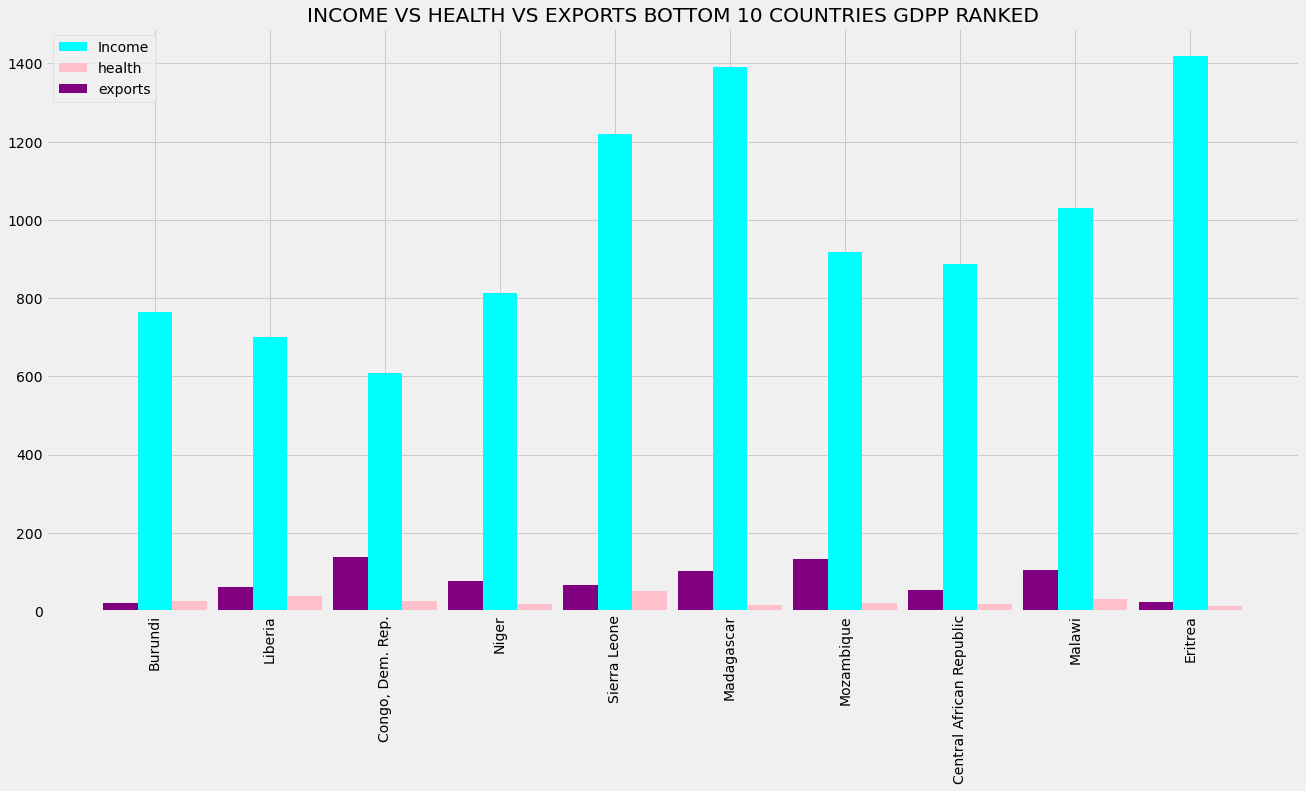

In [19]:
'''Below is the demonstration of Income , health and exports which are directly derived from mentioned gdpp'''

plt.style.use('fivethirtyeight')
data_bottom_10 = data_2.sort_values(by='gdpp',ascending=True).head(10) # taking the bottom 10 countrues
index_countries_bottom = np.arange(len(data_bottom_10.country))
country_labels1 = data_bottom_10.country.to_list()
fig = plt.figure(figsize = (20,10))
width = 0.3

plt.bar(index_countries,data_bottom_10.income,width=width,color =  'cyan' ,label = "Income")
plt.bar(index_countries+width, data_bottom_10.health_value,width=width,color = 'pink',label = "health")
plt.bar(index_countries-width,data_bottom_10.exports_value,color = 'purple',width=width,label = "exports")
plt.title("INCOME VS HEALTH VS EXPORTS BOTTOM 10 COUNTRIES GDPP RANKED")
plt.xticks(ticks=index_countries,labels=country_labels1,rotation = 90)
plt.legend()
plt.show()



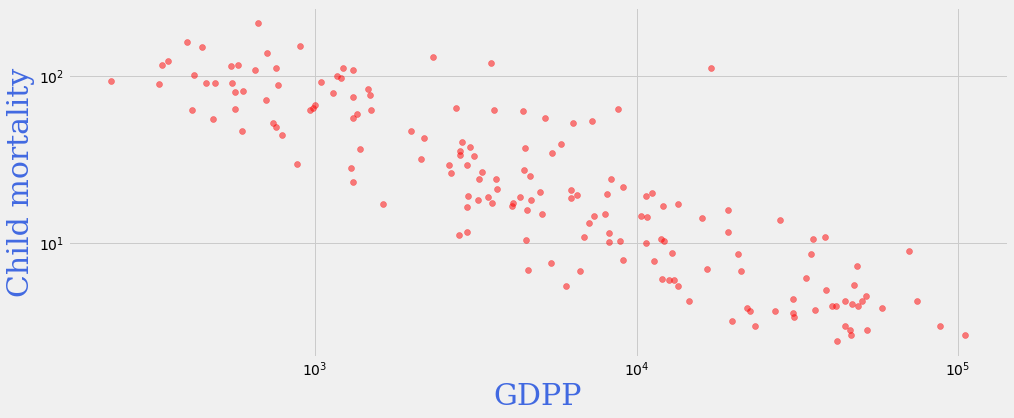

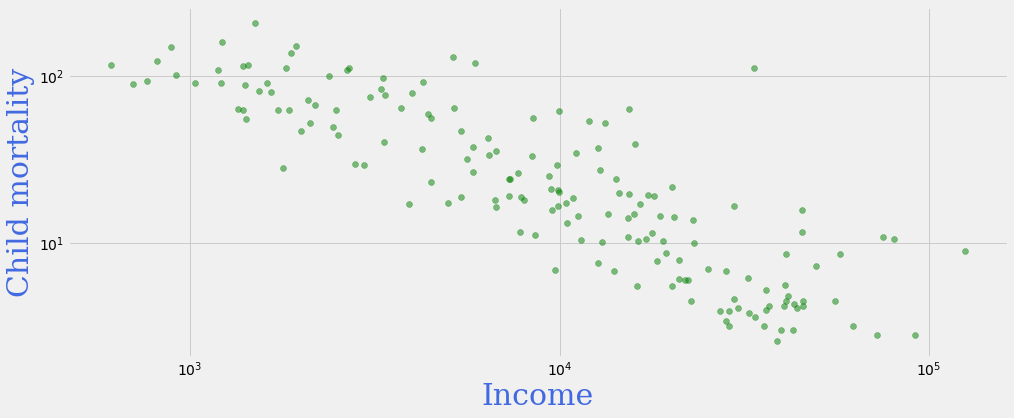

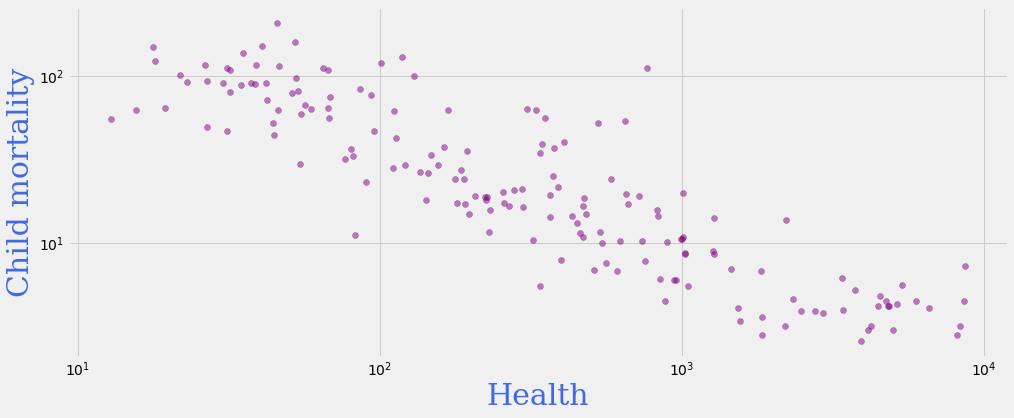

In [20]:
# lets plot scatter plot with respect to child mortality , gdpp ,income and see if there is 
#any correlation with respect to these fields
fig = plt.figure(figsize=(15,6))
plt.scatter(data_2.gdpp,data_2.child_mort , label = 'gdpp',alpha=0.5 , color = 'red',linewidths=0.5)
plt.xlabel("GDPP",fontdict=font)
plt.ylabel("Child mortality",fontdict=font)
plt.xscale('log') # using log scale since the data plotted is in two different ranges
plt.yscale('log')
plt.show()

'''There is a vary shallow relationship with child  mortality  something which can be definitely
noticed here is that as my gdpp is increasing mortality rate is almost becoming close to zero
'''

fig = plt.figure(figsize=(15,6))
plt.scatter(data_2.income,data_2.child_mort , label = 'gdpp',alpha=0.5 , color = 'green',linewidths=0.5)
plt.xlabel("Income",fontdict=font)
plt.ylabel("Child mortality",fontdict=font)
plt.xscale('log')
plt.yscale('log')
plt.show()


fig = plt.figure(figsize=(15,6))
plt.scatter(data_2.health_value,data_2.child_mort , label = 'Health',alpha=0.5 , color = 'purple',linewidths=0.5)
plt.xlabel("Health",fontdict=font)
plt.ylabel("Child mortality",fontdict=font)
plt.xscale('log')
plt.yscale('log')

plt.show()






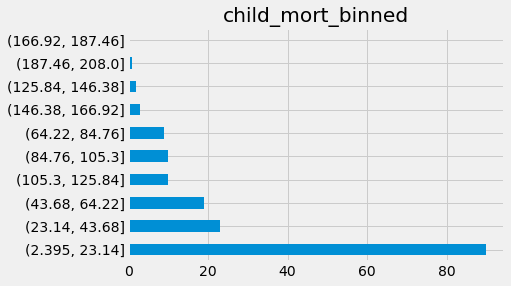

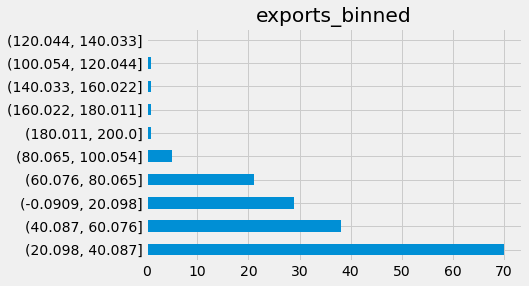

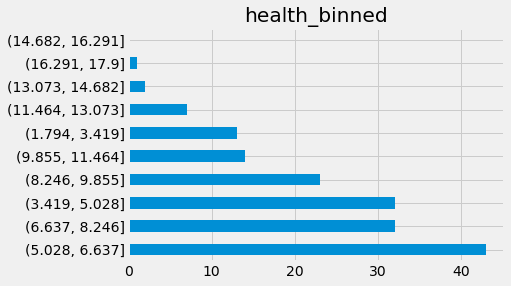

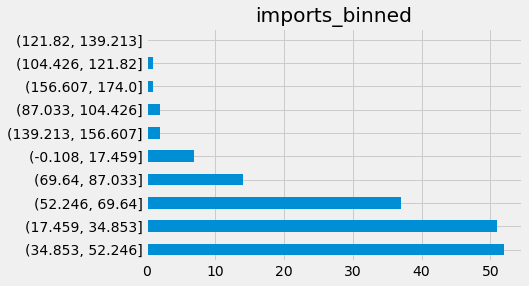

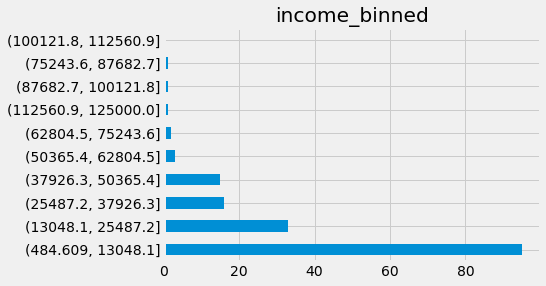

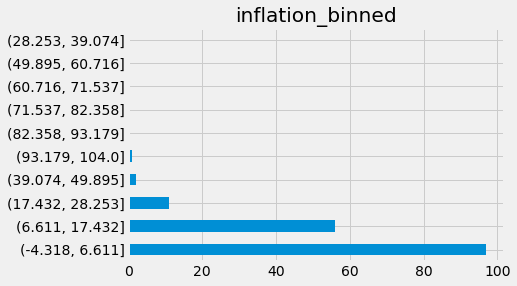

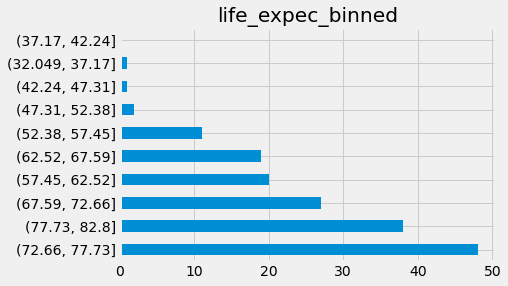

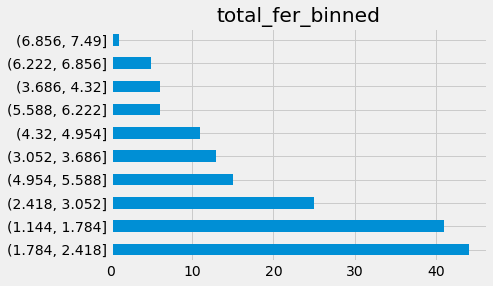

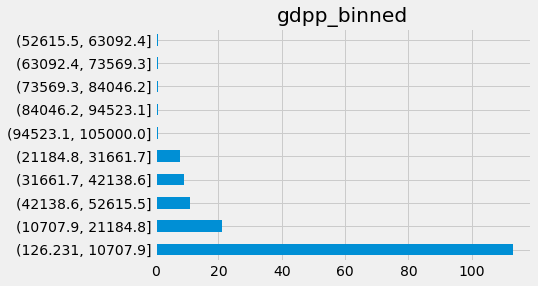

'1. Child Mortality for majority of country in our dataset is less than or equal to 23.14. There is \nmajor concern for countries which are lying above 140 range and are seem to be close to be 10 in numbers\n2. Majority of the exports as a percentage of gdpp can be seen lying close to a range of 20,908 and \n40.807 whereas a few of the countries are in the range of above 180 , these countries are definitely the coun\ntries which can be zoned into developed region since they are exceeding the gdpp in exports itself and \ndoes not require any kind of funding\n3.Maximum number of countries are spending close to 6% of their gdpp in health and few can be seen as \nthe outliers in this segment such as coming close to 16.26 - 17.9. These countries are also showing \nneglgible amount of mortality rate whereas some countries as low as in the range of 1.749'

In [21]:
# since we have alreaady created continious variables with respect to health , import , export value


columns_binned = data_2.filter(like='binned').columns

for features in columns_binned:
    
    if 'exports_value_binned' in features:
        pass
    else:
        data_2[features].value_counts().plot.barh()
        plt.title(features)
        plt.show()
        

''' In the above segment we have binned the above numerical features into segments based on width of the
columns'''

'''1. Child Mortality for majority of country in our dataset is less than or equal to 23.14. There is 
major concern for countries which are lying above 140 range and are seem to be close to be 10 in numbers
2. Majority of the exports as a percentage of gdpp can be seen lying close to a range of 20,908 and 
40.807 whereas a few of the countries are in the range of above 180 , these countries are definitely the coun
tries which can be zoned into developed region since they are exceeding the gdpp in exports itself and 
does not require any kind of funding
3.Maximum number of countries are spending close to 6% of their gdpp in health and few can be seen as 
the outliers in this segment such as coming close to 16.26 - 17.9. These countries are also showing 
neglgible amount of mortality rate whereas some countries as low as in the range of 1.749'''

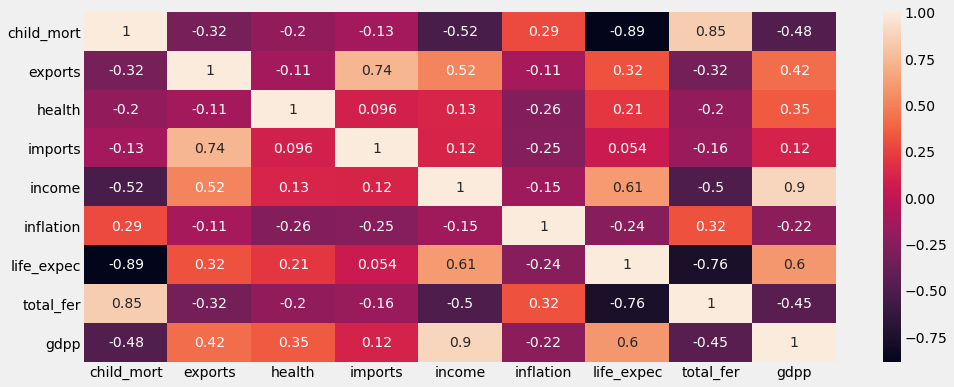

In [22]:
# Plotting the heatmap 
# we will be plotting the heatmap further to see how each of the variables are varying with each
# other


fig,ax = plt.subplots(figsize=(15,6))
data_corr1 = data_1.corr()

sns.heatmap(data_corr1 , annot=True)
plt.show()



# TOWARDS CLUSTERING
1. We are going to do clustering using two different methods kmeans and hierarchical clustering. 
2. We won't be treating outliers in this particular model but will be accessing and the model and based on the results will try to go with removing outliers





WHY K MEANS CLUSTERING - 
K means clustering works on the simple principle of euclidean distance where my major goal is to keep the datapoints in the similar group who are showing similar average eucliedean distance with respect to their centers. Any cluster formed thus will be presumed to have similar characteristic and thus a seprate and focused strategy can be formed for that cluster. In our case our goal is to identify cluster which consists of poorest countries in terms of econonmic , health and other factors and pick countries out of those clusters who are in need of direct financial aid.

Disadvantages - No of Clusters needs to be predefined and thus the result can vary at large also it is largely influenced by the outliers

We will be starting with K means Clustering , Where we will be using Sum of Square Distances and Silhoutee Analysis to decide upon the number of clusters needed

WHY HIERARCHICAL CLUSTERING
1. It holds an advantage towards K means Clustering in the sense that we don't have to preselect the number of clusters. Hierarchical Clustering uses eucliedean distance two merge data points and form clusters , the method continues till one single cluster is obtained. We can plot the entire life cycle of hierarchical clustering using dendogram , dendogram can help to picture how the clusters are merging and how many and what kind of clusters can be obtained by cutting each branch of the dendogram.
Disadvantages - It is computationaly heavy compared to K means since number of clusters are not predetermined and thus the algorithms runs till convergence happens to one single cluster.

Types of Hierarchical Clustering
1. Single Linkage Clustering - Single Linkage Clustering is the method in which two datapoints are formed to merge one single cluster and it keeps on happening till all the pairs are formed.
2. Complete Linkage - This is the Complete Clustering cycle in which there is progression from many to
one single cluster.


CHECKING THE RELEVANCE OF CLUSTERS
1. We will be using Sum of Squared Distances as a cost function in our algorithm where we see how the number of clusters are affecting the Sum of Squared Distance and by what percentage the Sum of Squared Distance is reducing by increasing the Clusters
2. Silhoutte Score - Silhoutte Score is another factor which we will use to determine the optimal no of clusters , we will be measuring two metrics intra cluster and inter cluster distance. We will be reducing the intra cluster distance and increasing the inter cluster distance. Giving an optimally seprated and cohesively consized clusters


In [23]:
# we will be using data_1 for clustering and will be further removing the column country since it can not be processed

data_model_cluster = data_1.drop('country',axis = 1)

data_model_cluster['imports_percentage'] = data_model_cluster['imports']/100
data_model_cluster['health_percentage'] = data_model_cluster['health']/100
data_model_cluster['exports_percentage'] = data_model_cluster['exports']/100




In [24]:
data_model_cluster['imports_absolute_value'] = data_model_cluster['imports_percentage']*data_model_cluster.gdpp

data_model_cluster['exports_absolute_value'] = data_model_cluster['exports_percentage']*data_model_cluster.gdpp

data_model_cluster['health_absolute_value'] = data_model_cluster['health_percentage']*data_model_cluster.gdpp

In [25]:
data_model_cluster.drop(['exports','health','imports','imports_percentage',
                       'exports_percentage','health_percentage'],axis=1,inplace=True)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
standard_scaler = StandardScaler()

'''We will be using Standardisation to Standardise our features . The main reason behind that is since
we will be using euclidean distance and also sum of square distance as a cost function. It is important 
to scale the features into similar dimensions. This is important because sum of Square is nothing but the 
measurment of variation or variance. We know that due to square being the exponential term in our mathematical
equation. Unit change can vastly impact the proper interpration of the variance and might lead to improper
clustering and valuation of clusters.
We can also use Min-Max scaler but  since our dataset is somewhat normally distributed , it is better to 
go ahead with Standardisation to further regularis our value.'''

'We will be using Standardisation to Standardise our features . The main reason behind that is since\nwe will be using euclidean distance and also sum of square distance as a cost function. It is important \nto scale the features into similar dimensions. This is important because sum of Square is nothing but the \nmeasurment of variation or variance. We know that due to square being the exponential term in our mathematical\nequation. Unit change can vastly impact the proper interpration of the variance and might lead to improper\nclustering and valuation of clusters.\nWe can also use Min-Max scaler but  since our dataset is somewhat normally distributed , it is better to \ngo ahead with Standardisation to further regularis our value.'

In [28]:
data_model_cluster

features_scaled = data_model_cluster.columns # features to be scaled

In [29]:
data_scaled = standard_scaler.fit_transform(data_model_cluster[features_scaled])

In [30]:
data_scaled = pd.DataFrame(data_scaled)

In [31]:
data_scaled.columns = features_scaled

In [32]:
data_scaled # our data is ready for the clustering

,child_mort,income,inflation,life_expec,total_fer,gdpp,imports_absolute_value,exports_absolute_value,health_absolute_value
0,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.432276,-0.411011,-0.565040
1,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.313677,-0.350191,-0.439218
2,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.353720,-0.318526,-0.484826
3,2.007808,-0.585043,1.387054,-1.179234,2.128151,-0.516268,-0.345953,-0.291375,-0.532363
4,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0.040735,-0.104331,-0.178771
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,-0.342488,-0.336864,-0.501562
163,-0.526514,-0.033542,3.616865,0.546361,-0.316678,0.029323,-0.287205,-0.199393,-0.219310
164,-0.372315,-0.658404,0.409732,0.286958,-0.661206,-0.637754,-0.377572,-0.361463,-0.538488
165,0.448417,-0.658924,1.500916,-0.344633,1.140944,-0.637754,-0.418479,-0.392166,-0.550596


In [55]:
'''Function for john hoplins statistics test'''
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [58]:
print(hopkins(data_scaled))

'''Data is showing high tendency for clustering'''

0.9534774066156763


'Data is showing high tendency for clustering'

In [33]:
from sklearn.cluster import KMeans

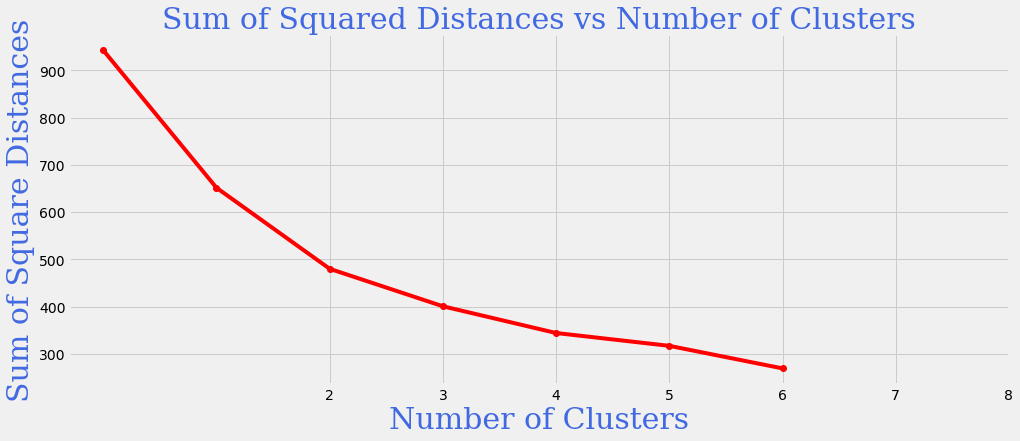

In [34]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd

fig,ax = plt.subplots(figsize = (15,6))
plt.plot(ssd,marker = 'o',color = 'red')
plt.ylabel("Sum of Square Distances",fontdict = font)
plt.xticks(ticks=[2,3,4,5,6,7,8])
plt.xlabel("Number of Clusters" , fontdict=font)
plt.title("Sum of Squared Distances vs Number of Clusters",fontdict=font)
plt.show()

In [35]:
# SILHOUETTE ANALYSIS 

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    # 3 no of clusters can be used since there is not much change in the score going from 0.3 to 0.4
    

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.43077513396770467
For n_clusters=6, the silhouette score is 0.30794636234648326
For n_clusters=7, the silhouette score is 0.3063337201866371
For n_clusters=8, the silhouette score is 0.29631301482377276


In [36]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data_scaled)

KMeans(max_iter=50, n_clusters=3)

In [37]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [38]:
data_1['cluster_id'] = kmeans.labels_

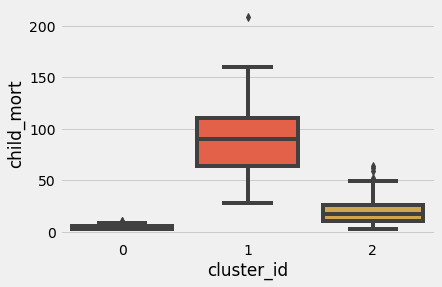

In [39]:
sns.boxplot(x='cluster_id', y='child_mort', data=data_1)

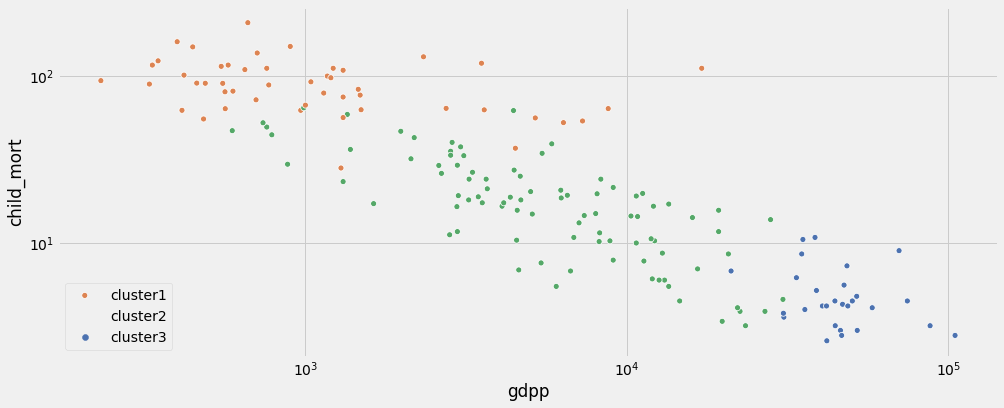

In [40]:
fig = plt.figure(figsize = (15,6))
sns.scatterplot(data_1.gdpp,data_1.child_mort,hue=data_1.cluster_id,palette='deep')
plt.yscale('log')
plt.xscale('log')
plt.legend(["cluster1","cluster2","cluster3"],loc = 3)
plt.show()

# something which we can notice is that there is not a really good sepration between cluster 1 and cluster 2
# There is a clear differentiation in terms of cluster zero but cluster 1 and 2 there is overlapping.
# Now as per my objective , we have to worry about cluster 1 and cluster2  , mostly cluster 2 because we want


# OUTLIERS TREATMENT

Since the Results are not very optimal , let's see if we can do outlier treatment. Outlier treatment will be only done if the number of countries removed are not a large part of dataset also the removed countries are not from any partticular segment.

In [41]:
# We are going to use the concept of IQR where lower whisker limit will be kept as Q1 - 1.5IQR 
# and uper whisker will be kept as Q3 + 1.5IQR , Q1 and Q3 are respectively at 0.05 and Q3 at 0.95

def remove_outliers(feature): 
    '''We are creating this function so that we can check how many outliers are getting removed by removing
    each of the feature'''
    
    data_5 = data_1.copy()
    m,n = data_5.shape # m will be no of rows of our original dataset and n will be the number of columns of our original dataset 
    Q1 = data_5[feature].quantile(0.25)
    Q3 = data_5[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    
    upper_whisker = Q3 + 1.5*IQR # Defining the upper whisker
    lower_whisker = Q1 - 1.5*IQR # Defining the lower whisker
    
    data_new = data_5[(data_5[feature] >= lower_whisker) & (data_5[feature]<= upper_whisker)]
    
    m1,n1 = data_new.shape # taking the new shape of the rows and columns
    
    set1 = set(data_5.country.to_list()) # converting the column of country into a list and then converting it into set
    set2 = set(data_new.country.to_list())
    
    removed_countries = list(set1.difference(set2))
    
    return removed_countries

In [42]:
''' We will be getting a nested list which will contain all the countries getting removed based up on 
our defined quantiles. In this particular case we have defined the quantiles as 0.25 and 0.75'''
list_append = []
for features in data_1.columns:
    if 'country' not in features:
        list_append.append(remove_outliers(features))
        

In [43]:
'''The below particular code will be used to convert our nested list into flattended list. Post which we
will be using type conversion of set to take only the unique countries getting removed from each feature.
To see the impact of outliers removal on the present volumne of our dataset'''
list_set = []

for list_a in list_append:
    for element in list_a:
        list_set.append(element)

print(len(set(list_set))) # we can see that removing all the outliers from all the features can cause the removal
# of close to 39 countries and since our dataset is 167 in row count we will be removing close
# to 24% data which is not a wice choise , also some of the outlier countries are actually the 
#country which require financial aid , so let's go ahead and try hierarichal clustering and
#see what results we get
# We will not be going forward with Outliers treatment since it can give us false results and can lead to
#poor distribution of funding
print(set(list_set))



39
{'Nigeria', 'Ireland', 'Iceland', 'Seychelles', 'Mongolia', 'Timor-Leste', 'Denmark', 'Switzerland', 'Canada', 'United Arab Emirates', 'Lesotho', 'Niger', 'United Kingdom', 'Netherlands', 'Central African Republic', 'Venezuela', 'Kuwait', 'Chad', 'Malta', 'France', 'United States', 'Sierra Leone', 'Qatar', 'Norway', 'Austria', 'Australia', 'Haiti', 'Luxembourg', 'Japan', 'Sweden', 'Belgium', 'Micronesia, Fed. Sts.', 'Finland', 'Germany', 'Equatorial Guinea', 'Brunei', 'Singapore', 'New Zealand', 'Italy'}


In [44]:

#hierarchical Clustering
'''We will be further using hierarchical clustering. The main advantage it holds over the other clustering
technique is that it does not assume any particular number of clusters or  centers. It works on the principle 
that based on the distance the two data points will get merged and this continues till we get one single cluster.
We can use Denodogram to Analyse the lifecyle of this clustering and to see every step of cluster formation
and find a suitable threshold based on the problem statment to cut the branch of our dendogram and get the 
suitable no of clusters . We will be analysing two techniques here 1. Single Linkage (here a cluster of two 
data points is formed for the whole dataset) 2.Complete linkage - which leads to the step by step formation
of the single cluster'''
# importing the necessary library 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


data_scaled.head() # we will be again passing data_scaled 

,child_mort,income,inflation,life_expec,total_fer,gdpp,imports_absolute_value,exports_absolute_value,health_absolute_value
0,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.432276,-0.411011,-0.565040
1,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.313677,-0.350191,-0.439218
2,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.353720,-0.318526,-0.484826
3,2.007808,-0.585043,1.387054,-1.179234,2.128151,-0.516268,-0.345953,-0.291375,-0.532363
4,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0.040735,-0.104331,-0.178771


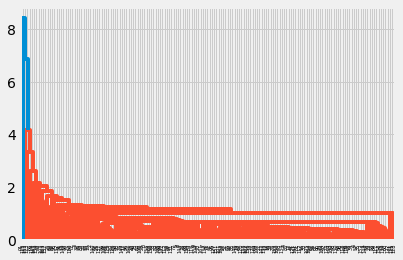

'As expected single linkage is not giving us a very evident picture'

In [45]:
mergings = linkage(data_scaled, method="single", metric='euclidean') # first trying out the single linkage
dendrogram(mergings)
plt.show()

'''As expected single linkage is not giving us a very evident picture'''

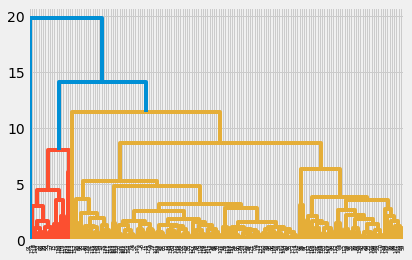

In [46]:
''' Lets go ahead and try multi linkage and see how the results shows up'''

mergings_complete = linkage(data_scaled, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

In [47]:
# We will be cutting the tree to get three clusters
'''Our main agenda is to get three different clusters which can help us segment the Countries into 
three different clusters , 
1. Cluster 1 - should contain the list of all the countries which are falling way below the avearage
of observed gdpp around the globe.
2. Cluster 2 - Should be the countries around the observed average gdpp as per our data
3. Cluster 3 - Should be the cluster of countries , which are fully developed showing above average gdpp
and superior health valuation.
Threfore we are going to further select number of clusters as 3.'''
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [48]:
data_1['cluster_id_hierarchical'] = cluster_labels

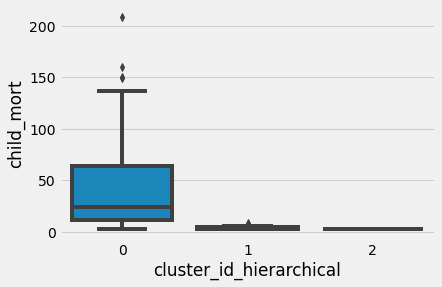

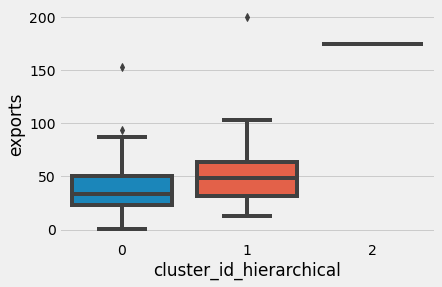

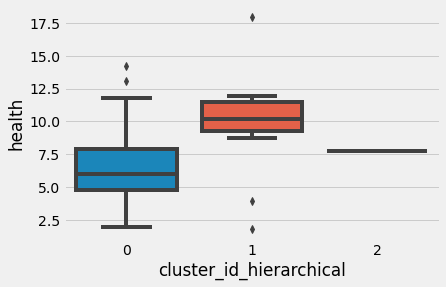

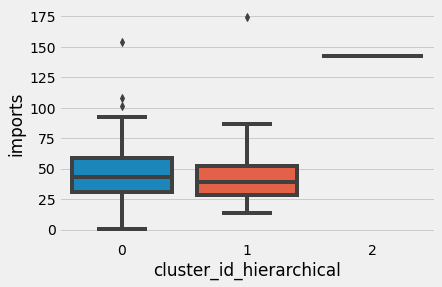

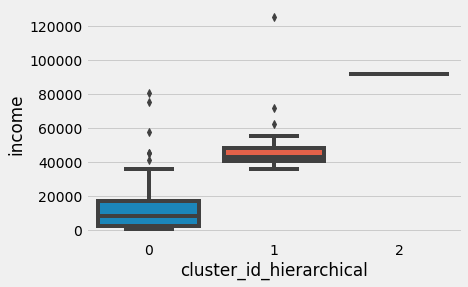

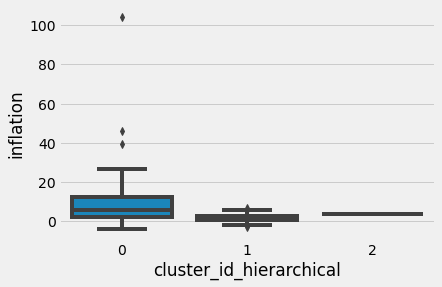

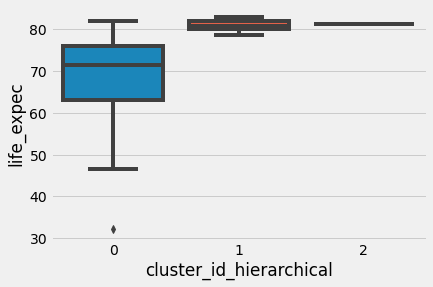

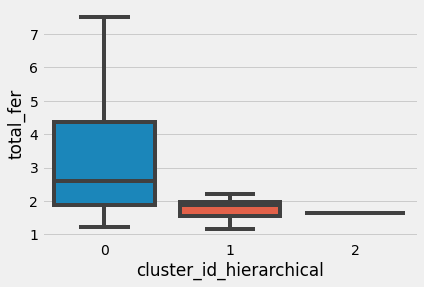

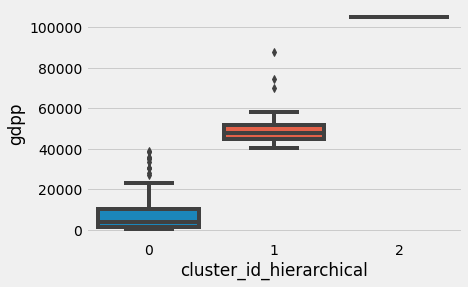

In [49]:
for feature in data_1.columns:
    if feature not in ['country','cluster_id_hierarchical','cluster_id']:
        sns.boxplot(data_1['cluster_id_hierarchical'],data_1[feature])
        plt.show()
        
        


        

In [50]:
countries_lowest_child_mortality = data_1[data_1['cluster_id_hierarchical'] == 2]
countries_average_child_mortality = data_1[data_1['cluster_id_hierarchical'] == 1]
countries_highest_child_mortality = data_1[data_1['cluster_id_hierarchical'] == 0]

In [51]:
countries_highest_child_mortality
'''Something which we noticed that gdpp is the factor which  defines the economic status of the country
 various socio economic factors such as Chid_mortaility , exports , life expectancy are a direct function
 of the gdpp , where a country having good gdpp is showing the least percentage in terms of child mortality 
 also is playing a big factor in classifying the range of other socio economic factors'''

# lets go ahead and pick up top 5 countries having highest child mortality rate and provide the list 
# for suggestive funding

countries_financial_aid = countries_highest_child_mortality.sort_values(by = 'child_mort',ascending=False).head(5)

In [52]:
countries_list = countries_financial_aid.iloc[:,0].to_list()

In [53]:
countries_list

['Haiti', 'Sierra Leone', 'Chad', 'Central African Republic', 'Mali']

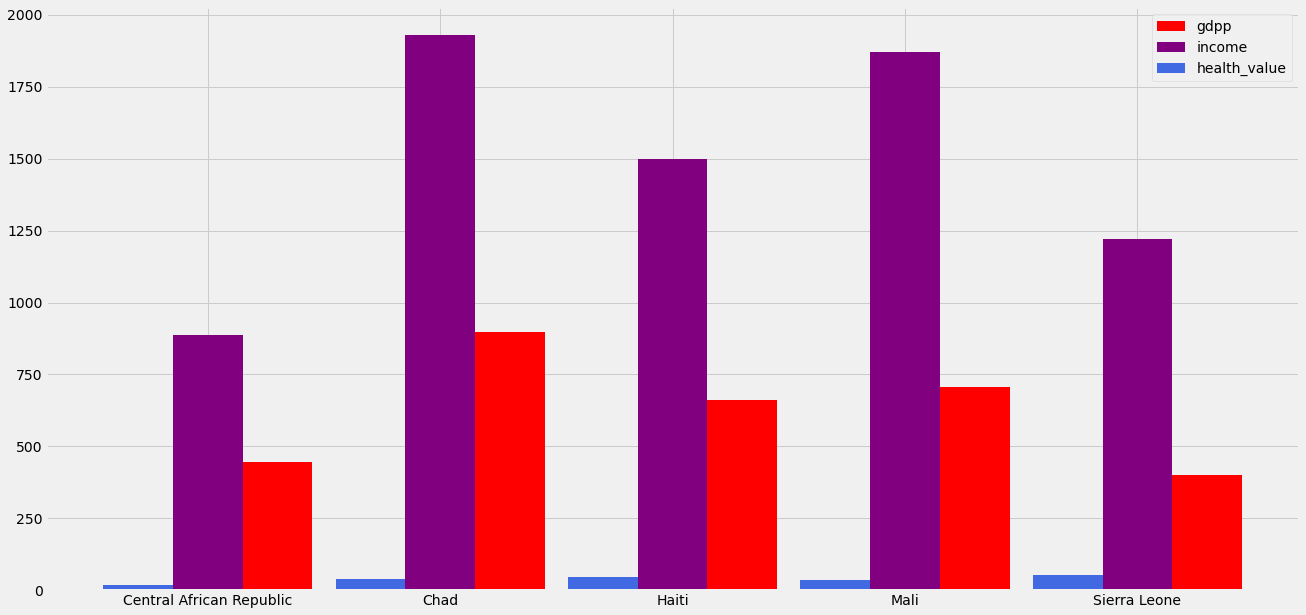

<Figure size 432x288 with 0 Axes>

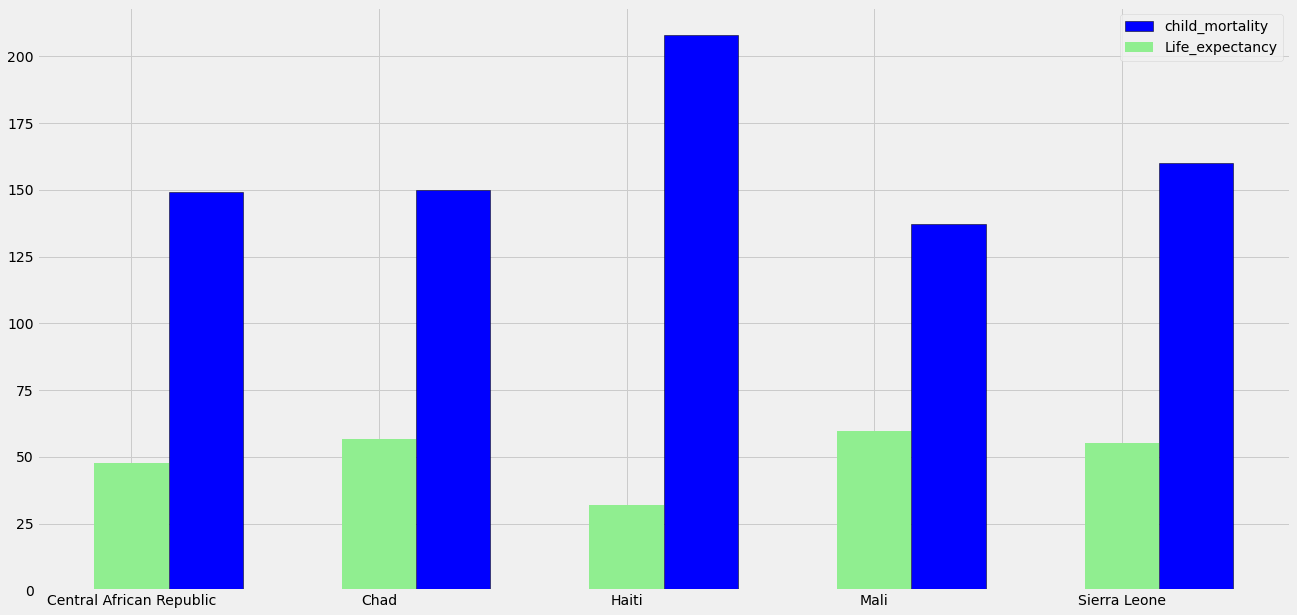

'From below Representation of our selected countries some of the inferences that can be made are \n1. Central African Republic is showing the lowest socio economic status among all the countries\nwhich are low ranked in terms of child mortality and overall economic status.\n2. In terms of child mortality and life expectancy the poorest of the ranking can be seen clearly\nwith resepct to the Haiti , which is showing lowest life expectancy and highest child mortality\nThe above two countries should be given a priority followed by other 3 countries. Major of the fund should be\ndirectly linked to the health funding , where it is clearly seen that lower health spending is causing \npoor living standards for the general public'

In [54]:
data_countries = data_2[data_2.country.isin(countries_list)] # taking the choosen country data to present in 
# the visual format

index_countries = np.arange(len(data_countries))

countries_list = data_countries.iloc[:,0].to_list()


fig = plt.figure(figsize = (20,10))
width = 0.3 # setting up the width

plt.bar(index_countries + width , data_countries.gdpp,width=width , color ='red')
plt.bar(index_countries , data_countries.income,width=width , color = 'purple')
plt.bar(index_countries-width,data_countries.health_value,width=width , color = 'royalblue')
plt.xticks(ticks=index_countries,labels=countries_list)
plt.legend(['gdpp','income','health_value'])
plt.show()
plt.savefig('gdpp vs income vs health_spendings - TOP5', dpi=1200)

fig = plt.figure(figsize=(20,10))
width = 0.3

plt.bar(index_countries + width ,data_countries.child_mort,width=width , color = "blue" , edgecolor = "black")
plt.bar(index_countries , data_countries.life_expec,width = width , color = 'lightgreen')
plt.xticks(ticks=index_countries , labels= countries_list)
plt.legend(['child_mortality','Life_expectancy'])
plt.show()

'''From below Representation of our selected countries some of the inferences that can be made are 
1. Central African Republic is showing the lowest socio economic status among all the countries
which are low ranked in terms of child mortality and overall economic status.
2. In terms of child mortality and life expectancy the poorest of the ranking can be seen clearly
with resepct to the Haiti , which is showing lowest life expectancy and highest child mortality
The above two countries should be given a priority followed by other 3 countries. Major of the fund should be
directly linked to the health funding , where it is clearly seen that lower health spending is causing 
poor living standards for the general public'''




# CONCLUSION
Top 5 Countries that needs financial aid are
1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali

Amount of financial aid is also supposed to be in the same order.

